In [18]:
## Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PyAstronomy.pyasl import foldAt
import scipy.signal


## Optimize for Jupyter Notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

RV_data = np.loadtxt('RV_data.txt',skiprows=16,usecols=(0,1,2,3,4))
lightcurve_data = np.loadtxt('lightcurve_data.txt',skiprows=18,usecols=(0,1))

In [19]:
BJD = RV_data[:,0]
Rad_Vel = RV_data[:,1]
Rad_Vel_Uncert = RV_data[:,2]
Bisect_Span = RV_data[:,3]
BS_Uncert = RV_data[:,4]

HJD = lightcurve_data[:,0]
flux = lightcurve_data[:,1]

array([2454953.538373, 2454953.558807, 2454953.579242, ...,
       2454997.9424  , 2454997.962835, 2454997.983269])

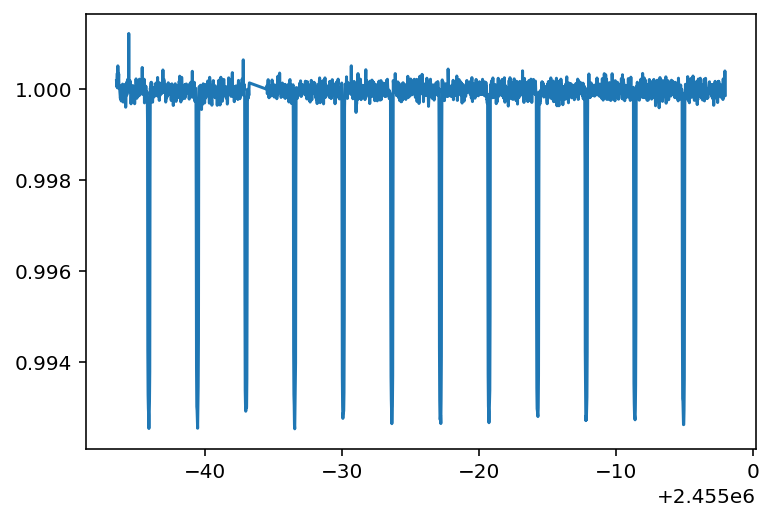

In [20]:
plt.plot(HJD, flux)
HJD

(0.992, 1.0005)

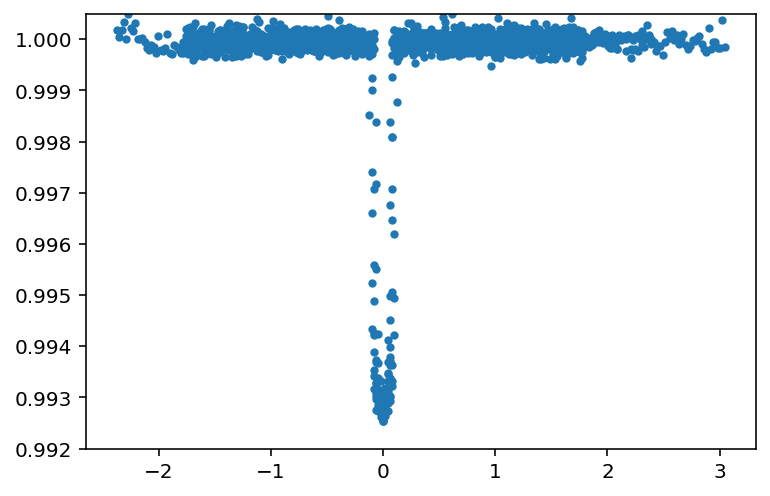

In [34]:
peak_index = scipy.signal.find_peaks(1/flux, distance=100)[0]
peak_index = peak_index[1:-1]

period = np.mean(np.ediff1d(HJD[peak_index]))

new_HJD = []

def find_nearest_value(array, values):
    indices = np.abs(np.subtract.outer(array, values)).argmin(0)
    return array[indices]

for i in range(len(flux)):
    shifted_index = find_nearest_value(peak_index,i)
    new_HJD.append(HJD[i]-HJD[shifted_index])
    
plt.scatter(new_HJD,flux,s=10)
plt.ylim(0.992,1.0005)

In [57]:
def lnprior(theta):
    # The parameters are stored as a vector of values, so unpack them
    period, width, t_first, amp_I, ti = theta
    # We're using only uniform priors, and only eps has a lower bound
    if period < 0 or period > 100:
        return -np.inf
    if width > 20 or width < 0:
        return -np.inf
    if t_first < 0 or t_first > 50:
        return -np.inf
    if amp_I > 0.2 or amp_I < -0.2:
        return -np.inf
    return 0

def lnlike(theta, date, y):
    
    ## Parameters
    period, width, t_first, amp_I, ti = theta 
    
    model = []
        
    
    # the likelihood is sum of the lot of normal distributions
    denom = np.sqrt(2*np.pi)
    
    ## compute the likelihood, but divide out fact.
    lp = np.sum((-(y - model)**2.0/(2)) - np.log(denom))
    return lp

def lnprob(theta, date, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, date, intensity, y)

def dip_model(time_index, width, amp_I):
    
    if time_index > -width/2 and time_index < width/2:
        return amp_I
    else: 
        return np.mean(flux)
    
    

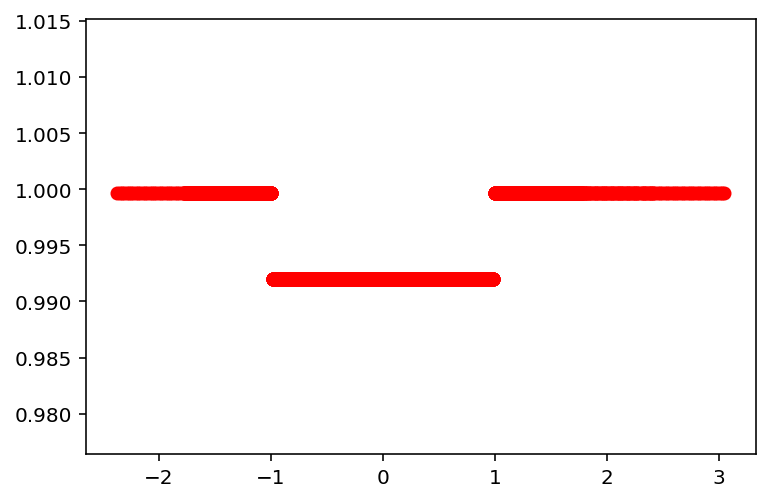

In [58]:
plt.scatter(new_HJD,[dip_model(x,2,0.992) for x in new_HJD],color='red')